In [93]:
import numpy as np
import threading
import matplotlib.pyplot as plt

In [94]:
def g(lock):
    global x
    lock.acquire()
    x = 3*(x**2) + 2*x - 1
    plt.title("Función g(x) = 3x^2 + 2x - 1")
    plt.plot(x)
    lock.release()

In [95]:
def f(lock):
    global x
    lock.acquire()
    x = np.sin(x) + np.cos(x)
    plt.figure(figsize = (15,6))
    plt.title("Función f(x) = sin(g(x)) + cos(g(x))")
    plt.plot(x)
    lock.release()

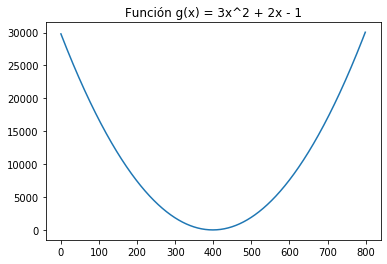

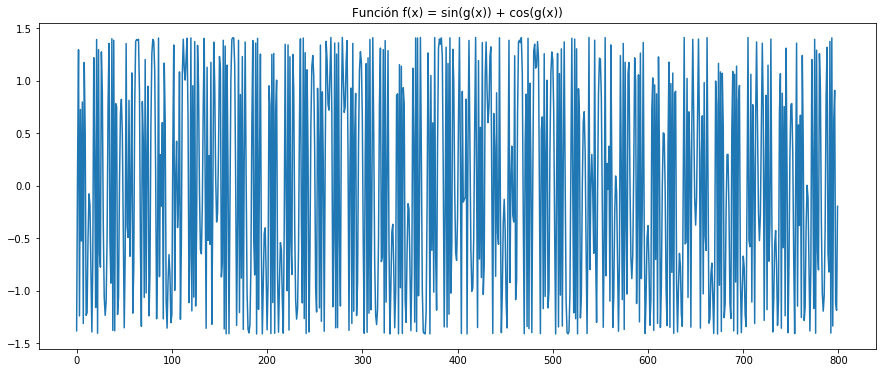

In [96]:
lock = threading.Lock()
x = np.arange(-100, 100, 0.25)

thread1 = threading.Thread(target = g, args = (lock,))
thread2 = threading.Thread(target = f, args = (lock,))

thread1.start()
thread2.start()


thread1.join()
thread2.join()